In [3]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [4]:
data_baishe = pd.read_csv('../douban_data/baishe_comment.csv',header=None)

In [5]:
data_baishe.columns=['ÁÇπËµûÊï∞','Áî®Êà∑Âêç','ËØÑÂàÜ','ÁÇπËØÑÊó∂Èó¥','Áü≠ËØÑ']

In [6]:
data_baishe.head()

ÁÇπËµûÊï∞    Áî®Êà∑Âêç  ËØÑÂàÜ        ÁÇπËØÑÊó∂Èó¥  \
0  2640    Êê¨Á†ñ‰æ†   3  2019-01-10   
1  1953     ÂáåÁùø   3  2019-01-09   
2  1779  Â•≥Á•ûÁöÑÁßãË£§   4  2019-01-05   
3  1341  Ê≤ßÊµ∑‰∏ÄÂ∞èÁîü   4  2019-01-11   
4   575  ÂòüÂòüÁÜä‰πãÁà∂   1  2019-01-08   

                                                  Áü≠ËØÑ  
0  ‰∏≠ÁæéÂêàÊãçÁöÑ„ÄäÊñ∞ÁôΩÂ®òÂ≠êÂâç‰º†„ÄãÔºåÂú®ËÑçÁÇô‰∫∫Âè£ÁöÑÁªèÂÖ∏‰º†ËØ¥ÁöÑÂü∫Á°Ä‰∏äÔºåÂä†ÂÖ•‰∫ÜÊõ¥ÂÖ∑ÊúâÁé∞‰ª£ÊÑüÁöÑÊîπÁºñÔºåÊïÖ‰∫ãÊãâÂõû...  
1  ÊçïËõáÊùëÁ∫¢Âè∂‰ººÁÅ´„ÄÅÈ£éÊôØÂ¶ÇÁîªÔºåÊùëÂ§ñÂ¥áÂ±±Â≥ªÂ≤≠„ÄÅÂ±ÇÊûóÂ∞ΩÊüìÔºåÊ∞∏Â∑ûÂüéÊµÅÂÖâÊ∫¢ÂΩ©„ÄÅÁÅØÁÅ´ËæâÁÖå„ÄÇ\nÊ∞¥Â¢®È£éÈùûÂ∏∏ÊÉä...  
2  2019Âπ¥ÁöÑÁ¨¨‰∏Ä‰ªΩÂõΩ‰∫ßÊÉäÂñúÔºåË∂ÖÂá∫È¢ÑÊúüÔºåËôΩÁÑ∂ËøòÊúâ‰∫∫Áâ©Ë°®ÊÉÖÂä®‰ΩúÁï•ÊòæÂÉµÁ°¨ÁöÑÈÄöÁóÖÔºå‰ΩÜÂ∑≤ÁªèÊØî„ÄäÈ£éËØ≠Âíí„Äã...  
3  ÁîªÈù¢Â§ÑÁêÜËÆ©‰∫∫ÊÉäËâ≥ÔºåÈÇ£‰∫õÂ¶ÇÁîªÈ£éÊôØÊ†©Ê†©Â¶ÇÁîü„ÄÅÈÇ£‰∫õÊâìÊñóÁöÑÂú∫Èù¢‰πüÊòØÁªÜËÖª„ÄÅÊ∞¥Âπ≥È¢áÈ´òÔºõÂΩ±ÁâáÊ∫ê‰∫éÂè§ËÄÅÁöÑÊïÖ‰∫ã...  
4  Â∑≤Èòµ‰∫°„ÄÇËøôÁ≤æËô´‰∏äËÑëËÖªËÖªÊ≠™Ê≠™ÁöÑÁà±ÊÉÖÂ§™‰ª§‰∫∫‰ΩúÂëï‰∫ÜÔºåË∞ÅÁúãË∞ÅÁûé„ÄÇ‰Ω†ËØ¥‰Ω†ÁîªÈ£éÊêûÈÇ£‰πàÁ≤æËá¥ÊúâÂï•Áî®ÔºüËØ∑‰∏™ÂêàÊ†º...

In [66]:
data_baishe.shape[0]

215

In [2]:
from wordcloud import WordCloud
import seaborn as sns
import jieba

In [9]:
data_baishe['Áü≠ËØÑ'].shape

(215,)

In [13]:
# Áü≠ËØÑÂàóË°®
content_list =  data_baishe['Áü≠ËØÑ'].values.tolist()
content_list

['‰∏≠ÁæéÂêàÊãçÁöÑ„ÄäÊñ∞ÁôΩÂ®òÂ≠êÂâç‰º†„ÄãÔºåÂú®ËÑçÁÇô‰∫∫Âè£ÁöÑÁªèÂÖ∏‰º†ËØ¥ÁöÑÂü∫Á°Ä‰∏äÔºåÂä†ÂÖ•‰∫ÜÊõ¥ÂÖ∑ÊúâÁé∞‰ª£ÊÑüÁöÑÊîπÁºñÔºåÊïÖ‰∫ãÊãâÂõûÂà∞‰∫Ü‰∫îÁôæÂπ¥ÂâçÔºåÁúüÊ≠£ÂÅöÂà∞‰∫ÜÊñá‰Ωì‰∏§ÂºÄËä±„ÄÇ‰∏≠ÂõΩÈ£éÁöÑÂú∫ÊôØÊå∫Á≤æËá¥ÔºåÂπ∂‰∏îÈ¢†Ë¶Ü‰∫ÜÊ≠§ÂâçËøΩÂÖâÂä®Áîª‰ΩúÂìÅÁöÑ‰ΩéÂπºÂ±ûÊÄßÔºå‰∏ªÊâìÊàê‰∫∫ÂêëÔºåÊó†ËÆ∫ÊòØÁîªÈ£éËøòÊòØÂΩ±Áâá‰∏≠ÁöÑ‚Äú‰∏ÄÂ§úÊÉÖ‚ÄùÊ°•ÊÆµÈÉΩÁõ∏ÂΩìÂ∞ëÂÑø‰∏çÂÆúÔºåÂè¶Â§ñËøòÊúâÂêëÂæêÂÖãÁâà„ÄäÈùíËõá„ÄãÂíåÂâßÁâà„ÄäÁôΩÂ®òÂ≠ê„ÄãËá¥Êï¨ÁöÑÂú∞ÊñπÔºå‰ΩÜÁº∫ÁÇπ‰æùÁÑ∂ÂæàÊòéÊòæÔºåÂâßÊÉÖËΩ¨ÊäòÁõ∏ÂΩìÁ™ÅÂÖÄÔºåÂæà‰∏çËøûË¥ØÔºåËÄå‰∏îËøΩÂÖâÂä®ÁîªÁ°ÆÂÆûÂú®ËßíËâ≤Âª∫Ê®°ÂíåÈù¢ÈÉ®Ë°®ÊÉÖËÆæËÆ°‰∏äÂá†‰πéÊØ´Êó†ËøõÊ≠•ÔºåËßíËâ≤‰∏ÄÊ∞¥ÂÑøÁöÑÈù¢Áò´ÂíåÁΩëÁ∫¢Èî•Â≠êËÑ∏ÔºåÂèØÊÉú‰∫Ü',
 'ÊçïËõáÊùëÁ∫¢Âè∂‰ººÁÅ´„ÄÅÈ£éÊôØÂ¶ÇÁîªÔºåÊùëÂ§ñÂ¥áÂ±±Â≥ªÂ≤≠„ÄÅÂ±ÇÊûóÂ∞ΩÊüìÔºåÊ∞∏Â∑ûÂüéÊµÅÂÖâÊ∫¢ÂΩ©„ÄÅÁÅØÁÅ´ËæâÁÖå„ÄÇ\nÊ∞¥Â¢®È£éÈùûÂ∏∏ÊÉäËâ≥ÔºåÊº´Â§©Ëí≤ÂÖ¨Ëã±Êó†ÊØîÊµ™Êº´ÔºåÁ∫∏‰∫∫ÂÜõÂõ¢ÊûÅËá¥ÈúáÊíºÔºåÂä®‰ΩúÊàèËÆ©‰∫∫Áû†ÁõÆÁªìËàå„ÄÇ\nÂ∞èÁôΩÊúÄ‰ªôÂ•≥ÔºåÂ∞èÈùíÊúÄÂ¶ñÂ®ÜÔºåÁãêÂ¶ñÊúÄÈÇ™È≠ÖÔºåËõáÊØçÊúÄÈú∏Ê∞îÔºå‰∏™‰∏™È£éÂçéÁªù‰ª£ÔºåËã±ÂßøÈ£íÁà

In [14]:
# ÂàÜËØç
segment=[]
for line in content_list: 
    try:
        segs = jieba.lcut(line)   
        for seg in segs:
            if len(seg)>1 and seg!='\r\n':
                segment.append(seg)
    except:
        print(line)
        continue

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 1.417 seconds.
Prefix dict has been built succesfully.


In [15]:
segment

['ÂêàÊãç',
 'Êñ∞ÁôΩÂ®òÂ≠ê',
 'Ââç‰º†',
 'ËÑçÁÇô‰∫∫Âè£',
 'ÁªèÂÖ∏',
 '‰º†ËØ¥',
 'Âü∫Á°Ä',
 'Âä†ÂÖ•',
 'ÂÖ∑Êúâ',
 'Áé∞‰ª£ÊÑü',
 'ÊîπÁºñ',
 'ÊïÖ‰∫ã',
 'ÂõûÂà∞',
 '‰∫îÁôæÂπ¥',
 'ÁúüÊ≠£',
 'ÂÅöÂà∞',
 'Êñá‰Ωì',
 'ÂºÄËä±',
 '‰∏≠ÂõΩ',
 'Âú∫ÊôØ',
 'Á≤æËá¥',
 'Âπ∂‰∏î',
 'È¢†Ë¶Ü',
 'Ê≠§Ââç',
 'ËøΩÂÖâ',
 'Âä®Áîª',
 '‰ΩúÂìÅ',
 '‰ΩéÂπº',
 'Â±ûÊÄß',
 '‰∏ªÊâì',
 'Êàê‰∫∫',
 'Êó†ËÆ∫ÊòØ',
 'ÁîªÈ£é',
 'ËøòÊòØ',
 'ÂΩ±Áâá',
 '‰∏ÄÂ§úÊÉÖ',
 'Ê°•ÊÆµ',
 'Áõ∏ÂΩì',
 'Â∞ëÂÑø‰∏çÂÆú',
 'Âè¶Â§ñ',
 'ËøòÊúâ',
 'ÂæêÂÖã',
 'ÈùíËõá',
 'ÂâßÁâà',
 'ÁôΩÂ®òÂ≠ê',
 'Ëá¥Êï¨',
 'Âú∞Êñπ',
 'Áº∫ÁÇπ',
 '‰æùÁÑ∂',
 'ÊòéÊòæ',
 'ÂâßÊÉÖ',
 'ËΩ¨Êäò',
 'Áõ∏ÂΩì',
 'Á™ÅÂÖÄ',
 '‰∏çËøûË¥Ø',
 'ËÄå‰∏î',
 'ËøΩÂÖâ',
 'Âä®Áîª',
 'Á°ÆÂÆû',
 'ËßíËâ≤',
 'Âª∫Ê®°',
 'Èù¢ÈÉ®',
 'Ë°®ÊÉÖ',
 'ËÆæËÆ°',
 'Âá†‰πé',
 'ÊØ´Êó†',
 'ËøõÊ≠•',
 'ËßíËâ≤',
 '‰∏ÄÊ∞¥ÂÑø',
 'Èù¢Áò´',
 'ÁΩëÁ∫¢',
 'Èî•Â≠ê',
 'ÂèØÊÉú',
 'ÊçïËõáÊùë',
 'Á∫¢Âè∂',
 '‰ººÁÅ´',
 'È£éÊôØÂ¶ÇÁîª',
 'ÊùëÂ§ñ',
 'Â¥áÂ±±Â≥ªÂ≤≠',
 'Â±ÇÊûóÂ∞ΩÊüì',
 'Ê∞∏Â∑û',
 'ÊµÅÂÖâÊ∫¢ÂΩ©',
 'ÁÅØÁÅ´ËæâÁÖå',
 'Ê∞¥Â¢®',
 'Èù

In [67]:

words_df = pd.DataFrame({'segment':segment})

In [68]:
wordcloud = WordCloud(font_path="../simhei.ttf"
                      ,background_color="black"
                      ,max_font_size=80)

In [69]:
# ÂéªÂÅúÁî®ËØç
stop_words = pd.read_csv('../stopwords.txt',
                        sep='\t',
                        quoting=3,
                        names=['stopword'],
                        encoding='utf8')
words_df_filter = words_df[~words_df.segment.isin(stop_words.stopword)]

In [73]:
words_stat = words_df_filter.groupby(by=['segment'])['segment'].agg({"ËÆ°Êï∞":np.size})
words_stat=words_stat.reset_index().sort_values(by=["ËÆ°Êï∞"],ascending=False)


/home/wang-tianlu/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  if __name__ == '__main__':


In [74]:
# ÁªüËÆ°ËØçÈ¢ë
word_frequence_filter={x[0]:x[1] for x in words_stat.head(1000).values}
word_frequence_filter

{'ÁóïËøπ': 4,
 'Ê∞îÊµÅ': 1,
 'ËÆ∏‰ªô': 22,
 'ÊÉ≥Ë±°Âäõ': 6,
 'ÈºìÂä±': 13,
 'Áúü‰∏çÈîô': 2,
 'Êó∂Èó¥': 3,
 'ÂºÄÂ§¥': 2,
 'Ê¨†Áº∫': 1,
 '‰∫∫Áîü': 2,
 '‰ΩéÈÖç': 2,
 'Áúã‰∏ÄÁúã': 1,
 'Áôª‰∏ä': 1,
 '‰∫ëÈõ®': 2,
 'Ê®™Ë°å': 1,
 'ÊòéÊòé': 2,
 'Â¶ñÂ°î': 2,
 'ÊòæÂæó': 6,
 'Â•∂Ëêå': 2,
 'ÁΩëÊ∏∏': 4,
 'Â∞ëÂπ¥': 2,
 'Â•Ω‰πÖÊ≤°': 2,
 'Áª≠ÈõÜ': 4,
 'ÁæéËΩÆÁæéÂ•Ç': 3,
 'Áõ∏Â§Ñ': 1,
 'Êì¶ËæπÁêÉ': 2,
 'Â§ßÈªÑËúÇ': 2,
 'ÂΩ¢Ë±°ËÆæËÆ°': 2,
 'Â±ÇÈù¢': 3,
 'Ê∞ë‰∏çËÅäÁîü': 1,
 'ÁîµÂΩ±Èô¢': 3,
 'ÂæàÊ£í': 2,
 'ÁâáÂ§¥': 1,
 'ÊªÇÊ≤±': 1,
 'ÁΩëÁ∫¢': 4,
 'Êñ≠Ê°•': 10,
 'ÁæéÊúØ': 5,
 'Êá¶Âº±': 2,
 '‰∫îÁôæÂπ¥': 8,
 'ÁÅ∞Êöó': 1,
 'Â∑ÆÂº∫‰∫∫ÊÑè': 2,
 'Ê≤°ÊÑèÊÄù': 1,
 'ÁÉÇÁâá': 3,
 '‰ª£ÂÖ•': 2,
 'Ê†áÂáÜ': 2,
 'ÈúáÊíº': 2,
 'ËßÇ‰ºó': 12,
 'Ê®™Âêë': 1,
 'ÈòøÂîê': 3,
 'ÂΩíÊù•': 6,
 'ÁîµÂΩ±': 32,
 '500': 2,
 '‰∏ÄÊù°': 4,
 'Áõ∏ÊÅã': 1,
 'ÈÄöÁóÖ': 2,
 'ÊöóÁ§∫': 2,
 'Ê≥ïÊúØ': 1,
 'ÂÜ≥Êàò': 2,
 'ËÆ∞ÂøÜ': 8,
 'Â•ΩÂê¨': 2,
 '‰∏ñÁïå': 2,
 'Â∑•‰∏ö': 2,
 'Ââç‰∏ñ': 13,
 'ÊîæÂú®': 2,
 'ta': 2,
 'Ë∞®ÊÖé': 2,
 'ÁîªÂ§ñÈü≥': 1,
 'Á∫¢ËÑ∏'

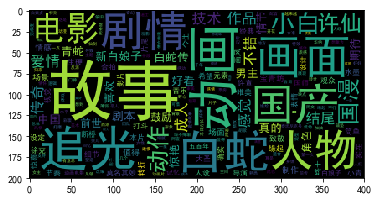

In [77]:
# ËØç‰∫ë
word_cloud_filter = wordcloud.fit_words(word_frequence_filter)
plt.imshow(word_cloud_filter)